In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/MLsheet - Vineland Adaptive Behavior Scales (1).csv')

In [ ]:
data.head()

,HAS ADHD,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COPING_V_SCALED,VINELAND_SOCIAL_STANDARD
0,0,11,11,75,12,10,13,79,12,10,14,80
1,0,16,13,93,11,15,14,89,11,10,12,78
2,0,9,8,71,11,9,14,77,8,8,11,67
3,0,13,10,81,9,9,11,69,7,8,15,73
4,0,13,10,72,14,13,9,78,7,10,10,54


In [ ]:
data.reset_index(names='id', inplace=True)

In [ ]:
data.isnull().sum()

,0
id,0
HAS ADHD,0
VINELAND_RECEPTIVE_V_SCALED,0
VINELAND_EXPRESSIVE_V_SCALED,0
VINELAND_COMMUNICATION_STANDARD,0
VINELAND_PERSONAL_V_SCALED,0
VINELAND_DOMESTIC_V_SCALED,0
VINELAND_COMMUNITY_V_SCALED,0
VINELAND_DAILYLVNG_STANDARD,0
VINELAND_INTERPERSONAL_V_SCALED,0


In [ ]:
data.shape

(1308, 13)

In [ ]:
# Calculate Communication Score
data['Communication_Score'] = (
    data['VINELAND_RECEPTIVE_V_SCALED'] +
    data['VINELAND_EXPRESSIVE_V_SCALED'] +
    data['VINELAND_COMMUNICATION_STANDARD']
) / 3

# Calculate Daily Living Score
data['Daily_Living_Score'] = (
    data['VINELAND_PERSONAL_V_SCALED'] +
    data['VINELAND_DOMESTIC_V_SCALED'] +
    data['VINELAND_COMMUNITY_V_SCALED'] +
    data['VINELAND_DAILYLVNG_STANDARD']
) / 4

# Calculate Socialization Score
data['Socialization_Score'] = (
    data['VINELAND_INTERPERSONAL_V_SCALED'] +
    data['VINELAND_PLAY_V_SCALED'] +
    data['VINELAND_COPING_V_SCALED'] +
    data['VINELAND_SOCIAL_STANDARD']
) / 4

# Calculate Overall Adaptive Score
data['Overall_Adaptive_Score'] = (
    data['Communication_Score'] +
    data['Daily_Living_Score'] +
    data['Socialization_Score']
) / 3

# Save the updated DataFrame back to a new CSV file (or overwrite the existing one)
data.to_csv('vineland_data_with_scores.csv', index=False)

print("Updated CSV file with scores saved as 'vineland_data_with_scores.csv'")


Updated CSV file with scores saved as 'vineland_data_with_scores.csv'


In [ ]:
df = pd.read_csv('/content/vineland_data_with_scores.csv')
df.head()

,id,HAS ADHD,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COPING_V_SCALED,VINELAND_SOCIAL_STANDARD,Communication_Score,Daily_Living_Score,Socialization_Score,Overall_Adaptive_Score
0,0,0,11,11,75,12,10,13,79,12,10,14,80,32.333333,28.50,29.00,29.944444
1,1,0,16,13,93,11,15,14,89,11,10,12,78,40.666667,32.25,27.75,33.555556
2,2,0,9,8,71,11,9,14,77,8,8,11,67,29.333333,27.75,23.50,26.861111
3,3,0,13,10,81,9,9,11,69,7,8,15,73,34.666667,24.50,25.75,28.305556
4,4,0,13,10,72,14,13,9,78,7,10,10,54,31.666667,28.50,20.25,26.805556


In [ ]:
df.describe()

,id,HAS ADHD,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COPING_V_SCALED,VINELAND_SOCIAL_STANDARD,Communication_Score,Daily_Living_Score,Socialization_Score,Overall_Adaptive_Score
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,653.500000,0.498471,12.201835,12.957187,89.272171,13.409786,12.532110,14.519878,90.256881,11.244648,12.345566,13.547401,85.122324,38.143731,32.679664,30.564985,33.796126
std,377.731386,0.500189,2.961977,2.939534,17.243455,2.917424,2.809653,3.130236,14.213846,3.569156,3.531886,3.492265,18.822662,7.351331,5.303492,6.980201,5.814760
min,0.000000,0.000000,4.000000,6.000000,32.000000,7.000000,2.000000,4.000000,42.000000,1.000000,1.000000,6.000000,20.000000,18.000000,14.500000,7.500000,16.777778
25%,326.750000,0.000000,10.000000,11.000000,77.000000,11.000000,11.000000,12.000000,81.000000,9.000000,10.000000,11.000000,75.000000,33.333333,29.250000,26.500000,29.694444
50%,653.500000,0.000000,12.000000,13.000000,90.000000,13.000000,13.000000,15.000000,89.000000,11.000000,13.000000,13.000000,83.000000,38.333333,32.250000,29.750000,33.694444
75%,980.250000,1.000000,15.000000,15.000000,100.000000,15.000000,14.000000,17.000000,100.000000,14.000000,15.000000,16.000000,95.000000,42.666667,36.250000,34.750000,37.055556
max,1307.000000,1.000000,19.000000,23.000000,138.000000,23.000000,20.000000,21.000000,127.000000,20.000000,19.000000,23.000000,138.000000,59.666667,46.000000,49.750000,50.138889


In [ ]:
# Create a new column 'Intellectual_Disability_Level' based on Overall_Adaptive_Score
bins = [0, 29, 33, 50]  # Define bins for mild, moderate, severe
labels = ['Mild', 'Moderate', 'Severe']
df['Intellectual_Disability_Level'] = pd.cut(df['Overall_Adaptive_Score'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df.head()

,id,HAS ADHD,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COPING_V_SCALED,VINELAND_SOCIAL_STANDARD,Communication_Score,Daily_Living_Score,Socialization_Score,Overall_Adaptive_Score,Intellectual_Disability_Level
0,0,0,11,11,75,12,10,13,79,12,10,14,80,32.333333,28.50,29.00,29.944444,Moderate
1,1,0,16,13,93,11,15,14,89,11,10,12,78,40.666667,32.25,27.75,33.555556,Severe
2,2,0,9,8,71,11,9,14,77,8,8,11,67,29.333333,27.75,23.50,26.861111,Mild
3,3,0,13,10,81,9,9,11,69,7,8,15,73,34.666667,24.50,25.75,28.305556,Mild
4,4,0,13,10,72,14,13,9,78,7,10,10,54,31.666667,28.50,20.25,26.805556,Mild


Class Distribution:
Intellectual_Disability_Level
Severe      744
Mild        284
Moderate    276
Name: count, dtype: int64

Class Percentages:
Intellectual_Disability_Level
Severe      56.880734
Mild        21.712538
Moderate    21.100917
Name: count, dtype: float64


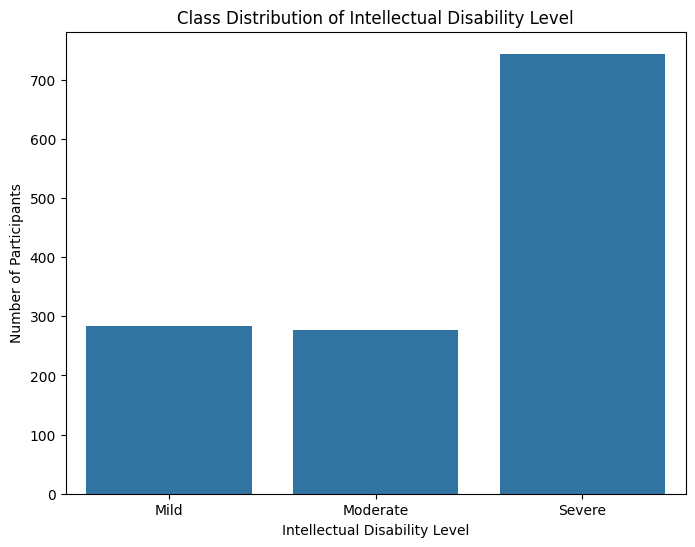

In [ ]:
# Check class distribution in the target variable
class_counts = df['Intellectual_Disability_Level'].value_counts()
print("Class Distribution:")
print(class_counts)

# Calculate percentage of each class
class_percentages = class_counts / len(df) * 100
print("\nClass Percentages:")
print(class_percentages)

# Visualize class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Intellectual_Disability_Level', data=df)
plt.title('Class Distribution of Intellectual Disability Level')
plt.xlabel('Intellectual Disability Level')
plt.ylabel('Number of Participants')
plt.show()

In [ ]:
# Save the DataFrame to a new CSV file
df.to_csv('processed_vineland_data.csv', index=False)

print("Data saved to 'processed_vineland_data.csv'")

Data saved to 'processed_vineland_data.csv'


In [ ]:
# Prepare the data for modeling
X = df[['Overall_Adaptive_Score']]  # Use only Overall_Adaptive_Score as a predictor
y = df['Intellectual_Disability_Level']

In [ ]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       288
           3       1.00      1.00      1.00         1

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524



In [ ]:
# prompt: do L2 regularisation for preventing over fitting

from sklearn.linear_model import LogisticRegression



In [ ]:
# Create and train the model (Logistic Regression with L1 regularization)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_l1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_l1 = model_l1.predict(X_test)

# Evaluate the model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("Accuracy (L1 Regularization):", accuracy_l1)
print(classification_report(y_test, y_pred_l1))

# Create and train the model (Logistic Regression with L2 regularization)
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)  # Adjust C for regularization strength
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (L2 Regularization) :", accuracy)
print(classification_report(y_test, y_pred))

Accuracy (L1 Regularization): 0.7786259541984732
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       117
           1       1.00      0.03      0.05       118
           2       0.80      1.00      0.89       288
           3       0.00      0.00      0.00         1

    accuracy                           0.78       524
   macro avg       0.63      0.51      0.45       524
weighted avg       0.83      0.78      0.69       524

Accuracy (L2 Regularization) : 0.7729007633587787
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       117
           1       0.00      0.00      0.00       118
           2       0.77      1.00      0.87       288
           3       0.00      0.00      0.00         1

    accuracy                           0.77       524
   macro avg       0.39      0.50      0.44       524
weighted avg       0.60      0.77      0.67       524



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

In [ ]:
# Create and train the model (Support Vector Machine with regularization)
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=0.1, random_state=42)  # Adjust C for regularization strength
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM with Regularization):", accuracy_svm)
print(classification_report(y_test, y_pred_svm))

Accuracy (SVM with Regularization): 0.9580152671755725
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       117
           1       1.00      0.82      0.90       118
           2       1.00      1.00      1.00       288
           3       0.00      0.00      0.00         1

    accuracy                           0.96       524
   macro avg       0.71      0.71      0.70       524
weighted avg       0.96      0.96      0.96       524



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create and train the model (Naive Bayes)
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = model_nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (Naive Bayes):", accuracy_nb)
print(classification_report(y_test, y_pred_nb))

Accuracy (Naive Bayes): 0.9389312977099237
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       117
           1       1.00      0.73      0.84       118
           2       0.97      1.00      0.98       288
           3       1.00      1.00      1.00         1

    accuracy                           0.94       524
   macro avg       0.95      0.93      0.94       524
weighted avg       0.95      0.94      0.94       524



In [ ]:
# prompt: Ensemble Methods with Regularization

from sklearn.ensemble import VotingClassifier

# Create individual models
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_lr_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model_svm = SVC(kernel='linear', C=0.1, probability=True, random_state=42)  # probability=True for soft voting

# Create an ensemble using VotingClassifier with soft voting
ensemble_model = VotingClassifier(estimators=[('rf', model_rf), ('lr_l2', model_lr_l2), ('svm', model_svm)],
                                  voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Accuracy (Ensemble with Soft Voting):", accuracy_ensemble)
print(classification_report(y_test, y_pred_ensemble))

Accuracy (Ensemble with Soft Voting): 0.9980916030534351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       288
           3       0.00      0.00      0.00         1

    accuracy                           1.00       524
   macro avg       0.75      0.75      0.75       524
weighted avg       1.00      1.00      1.00       524



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import classification_report

# Define the neural network model with enhancements
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),   # Increased units
    layers.BatchNormalization(),
    layers.Dropout(0.3),  # Adding dropout to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model with a lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluate the model
print(classification_report(y_test, y_pred))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5102 - loss: 1.1120 - val_accuracy: 0.6242 - val_loss: 3.5381
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.4995 - val_accuracy: 0.6242 - val_loss: 3.7824
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8529 - loss: 0.3897 - val_accuracy: 0.6242 - val_loss: 3.3852
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8479 - loss: 0.3785 - val_accuracy: 0.6242 - val_loss: 2.9040
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8595 - loss: 0.3054 - val_accuracy: 0.6242 - val_loss: 2.5365
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8688 - loss: 0.2977 - val_accuracy: 0.6242 - val_loss: 2.2797
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8730 - loss: 0.3289 - val_accuracy: 0.6242 - val_loss: 2.0122
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8210 - loss: 0.3773 - val_accuracy: 0.6433 - val_loss: 1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 0.07888040712468193
Root Mean Squared Error (RMSE): 0.28311247191836175


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

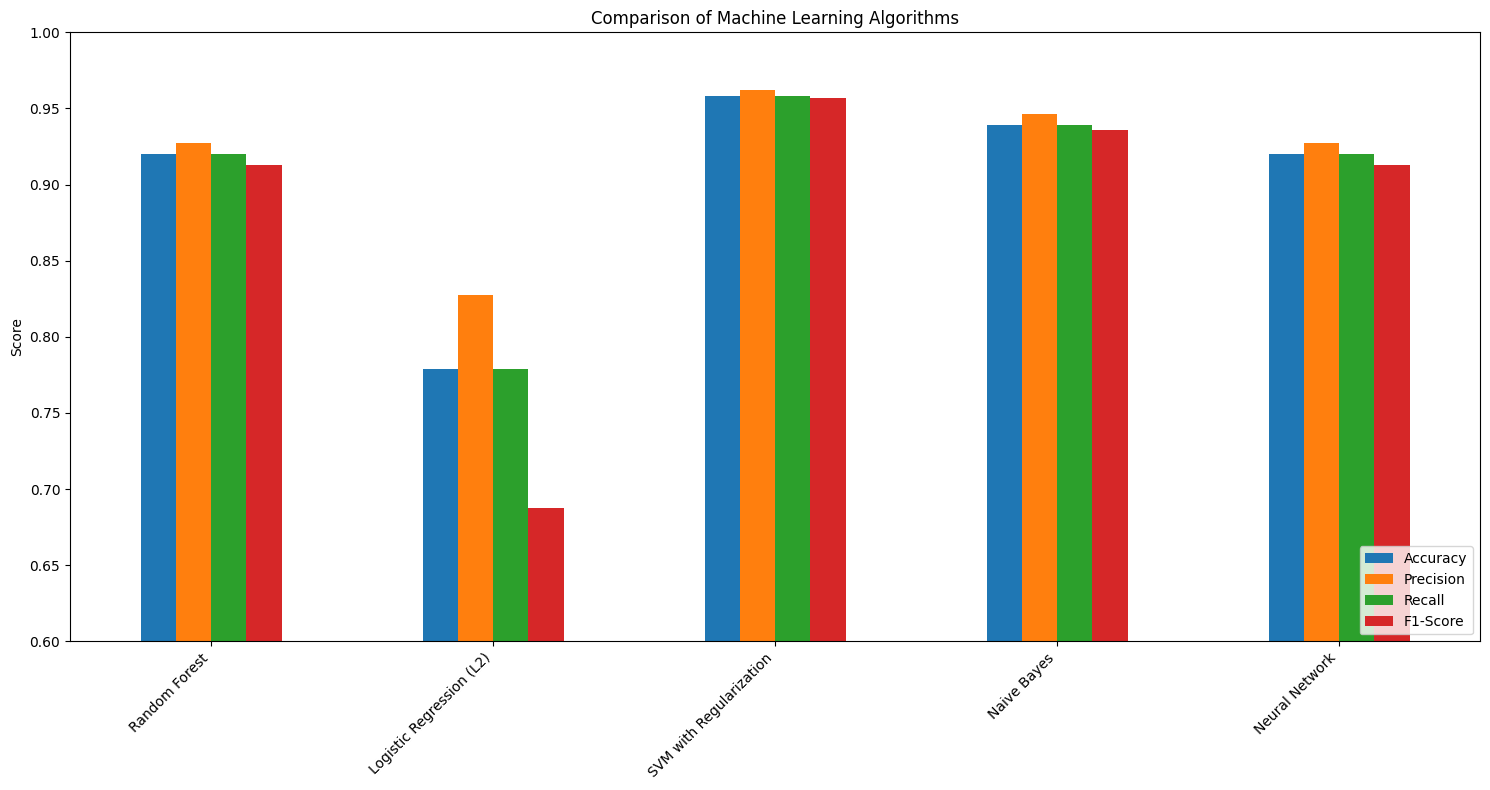

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    },
    'Logistic Regression (L2)': {
        'Accuracy': accuracy_score(y_test, y_pred_l1),
        'Precision': precision_score(y_test, y_pred_l1, average='weighted'),
        'Recall': recall_score(y_test, y_pred_l1, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_l1, average='weighted')
    },
    'SVM with Regularization': {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
        'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_svm, average='weighted')
    },
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test, y_pred_nb),
        'Precision': precision_score(y_test, y_pred_nb, average='weighted'),
        'Recall': recall_score(y_test, y_pred_nb, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_nb, average='weighted')
    },
    'Neural Network': {
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    },
}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Transpose the DataFrame for better visualization
results_df = results_df.transpose()

# Create a bar plot to compare the results
results_df.plot(kind='bar', figsize=(15, 8))
plt.title('Comparison of Machine Learning Algorithms')
plt.ylabel('Score')
plt.ylim(0.6, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results)

# Transpose the DataFrame for better visualization
results_df = results_df.transpose()

results_df

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.919847,0.927062,0.919847,0.913112
Logistic Regression (L2),0.778626,0.827147,0.778626,0.687659
SVM with Regularization,0.958015,0.962212,0.958015,0.956756
Naive Bayes,0.938931,0.946217,0.938931,0.936108
Neural Network,0.919847,0.927062,0.919847,0.913112


#Live data integration

In [ ]:
dl = pd.read_csv('/content/Live data.csv')
dl.head()

,ID,Name,Age,Gender,Diagnosis,Severity,Disability %,Condition,Affected Body Part,IQ,VABS,Social Quotient
0,MH2220920160109086,Zaud Auranzeb Shaikh,5,Male,Intellectual disability,Borderline,25%,Temporary,Brain,60,65.0,65.0
1,MH2220920190164080,Prithvik Kamlesh Kamble,6,Male,Intellectual disability,Mild,50%,Non-progressive,Brain,55,60.0,60.0
2,MH22201220140158771,Sofiya Ashfaq Qazi,10,Female,Intellectual disability,Moderate,75%,Non-progressive,Nervous system,45,50.0,50.0
3,MH22201220140158772,Sofiya Ashfaq Qazi,10,Female,Hearing Impairment,Mild,1%,Temporary,Ear,NaN,NaN,NaN
4,MH2220920160203927,Mohammedzakir Mohammed Zaheer Mansuri,6,Male,Mental illness,Moderate,50%,Non-progressive,Brain,70,68.0,68.0


In [ ]:
dl = dl.rename(columns={'VABS': 'Overall_Adaptive_Score'})
dl.head()

,ID,Name,Age,Gender,Diagnosis,Severity,Disability %,Condition,Affected Body Part,IQ,Overall_Adaptive_Score,Social Quotient
0,MH2220920160109086,Zaud Auranzeb Shaikh,5,Male,Intellectual disability,Borderline,25%,Temporary,Brain,60,65.0,65.0
1,MH2220920190164080,Prithvik Kamlesh Kamble,6,Male,Intellectual disability,Mild,50%,Non-progressive,Brain,55,60.0,60.0
2,MH22201220140158771,Sofiya Ashfaq Qazi,10,Female,Intellectual disability,Moderate,75%,Non-progressive,Nervous system,45,50.0,50.0
3,MH22201220140158772,Sofiya Ashfaq Qazi,10,Female,Hearing Impairment,Mild,1%,Temporary,Ear,NaN,NaN,NaN
4,MH2220920160203927,Mohammedzakir Mohammed Zaheer Mansuri,6,Male,Mental illness,Moderate,50%,Non-progressive,Brain,70,68.0,68.0


In [ ]:
dl['Overall_Adaptive_Score'] = (dl['Overall_Adaptive_Score'] - dl['Overall_Adaptive_Score'].min()) / (dl['Overall_Adaptive_Score'].max() - dl['Overall_Adaptive_Score'].min()) * 50


In [ ]:
dl.describe()

,Age,Overall_Adaptive_Score,Social Quotient
count,13.000000,12.000000,12.000000
mean,8.000000,29.261364,55.416667
std,2.345208,14.415785,12.759726
min,5.000000,0.000000,30.000000
25%,6.000000,22.159091,49.500000
50%,8.000000,26.704545,51.500000
75%,10.000000,40.625000,65.750000
max,12.000000,50.000000,74.000000


In [ ]:
# Create a new column 'Intellectual_Disability_Level' based on Overall_Adaptive_Score
bins = [0, 29, 33, 50]  # Define bins for mild, moderate, severe
labels = ['Mild', 'Moderate', 'Severe']
dl['Intellectual_Disability_Level'] = pd.cut(dl['Overall_Adaptive_Score'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
dl = dl.drop('Name', axis=1)

In [ ]:
dl = dl.drop('ID', axis=1)

In [ ]:
dl.head()

,Age,Gender,Diagnosis,Severity,Disability %,Condition,Affected Body Part,IQ,Overall_Adaptive_Score,Social Quotient,Intellectual_Disability_Level
0,5,Male,Intellectual disability,Borderline,25%,Temporary,Brain,60,39.772727,65.0,Severe
1,6,Male,Intellectual disability,Mild,50%,Non-progressive,Brain,55,34.090909,60.0,Severe
2,10,Female,Intellectual disability,Moderate,75%,Non-progressive,Nervous system,45,22.727273,50.0,Mild
3,10,Female,Hearing Impairment,Mild,1%,Temporary,Ear,NaN,NaN,NaN,NaN
4,6,Male,Mental illness,Moderate,50%,Non-progressive,Brain,70,43.181818,68.0,Severe


Class Distribution:
Intellectual_Disability_Level
Mild        7
Severe      5
Moderate    0
Name: count, dtype: int64

Class Percentages:
Intellectual_Disability_Level
Mild        53.846154
Severe      38.461538
Moderate     0.000000
Name: count, dtype: float64


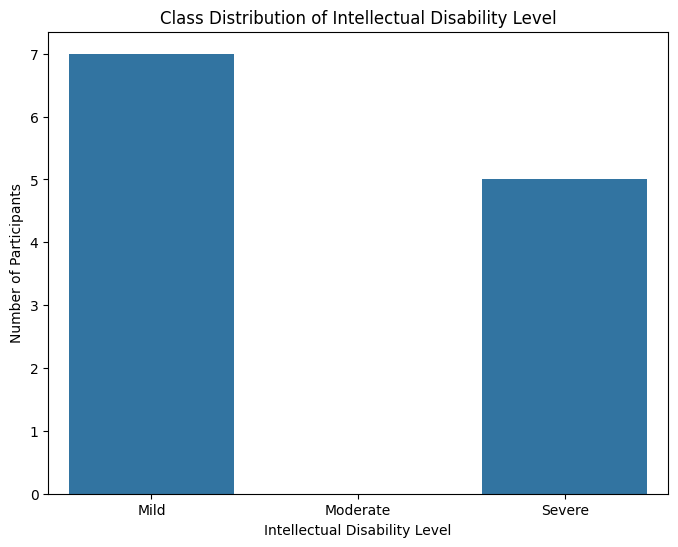

In [ ]:

# Check class distribution in the target variable
class_counts = dl['Intellectual_Disability_Level'].value_counts()
print("Class Distribution:")
print(class_counts)

# Calculate percentage of each class
class_percentages = class_counts / len(dl) * 100
print("\nClass Percentages:")
print(class_percentages)

# Visualize class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Intellectual_Disability_Level', data=dl)
plt.title('Class Distribution of Intellectual Disability Level')
plt.xlabel('Intellectual Disability Level')
plt.ylabel('Number of Participants')
plt.show()

In [ ]:
dl.columns

Index(['Age', 'Gender', 'Diagnosis', 'Severity', 'Disability %', 'Condition',
       'Affected Body Part', 'IQ', 'Overall_Adaptive_Score', 'Social Quotient',
       'Intellectual_Disability_Level'],
      dtype='object')

In [ ]:
# Assuming 'dl' is your DataFrame
for column in dl.columns:
  if dl[column].dtype == object:  # Check if the column has categorical data
    le = LabelEncoder()
    dl[column] = le.fit_transform(dl[column])

dl.head()

,Age,Gender,Diagnosis,Severity,Disability %,Condition,Affected Body Part,IQ,Overall_Adaptive_Score,Social Quotient,Intellectual_Disability_Level
0,5,1,3,0,1,2,0,6,39.772727,65.0,Severe
1,6,1,3,1,2,0,0,5,34.090909,60.0,Severe
2,10,0,3,2,6,0,2,2,22.727273,50.0,Mild
3,10,0,2,1,0,2,1,9,NaN,NaN,NaN
4,6,1,5,2,2,0,0,7,43.181818,68.0,Severe


In [ ]:
import pandas as pd

# Calculate the number of rows for the training set (30% of the total)
train_size = int(len(df) * 0.3)

# Sample 30% of the DataFrame for training
train_df = df.sample(n=train_size, random_state=42)  # Use random_state for reproducibility

# Save the training DataFrame to a new CSV file
train_df.to_csv('train.csv', index=False)

In [ ]:
# Prepare the data for modeling using train_df
X_train = train_df[['Overall_Adaptive_Score']]
y_train = train_df['Intellectual_Disability_Level']

# Encode the target variable for training data
le_train = LabelEncoder()
y_train = le_train.fit_transform(y_train)

In [ ]:
# Prepare the data for testing using dl
X_test = dl[['Overall_Adaptive_Score']]
y_test = dl['Intellectual_Disability_Level']

# Encode the target variable for testing data
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

In [ ]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2487 - loss: 3.4573
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 1.7505 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5760 - loss: 1.0364 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5809 - loss: 0.9348  
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5338 - loss: 0.9856  
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5772 - loss: 0.9211  
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 0.9637 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5516 - loss: 0.9776 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5564 - loss: 0.9356 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - loss: 0.9594 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5451 - loss: 0.9393  
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5815 -

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluate the model
print(classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.0769 - loss: nan
Test Loss: nan
Test Accuracy: 0.07692307978868484
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1

    accuracy                           0.08        13
   macro avg       0.17      0.05      0.07        13
weighted avg       0.27      0.08      0.12        13



In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network model with added dropout and batch normalization
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Output layer with softmax for multi-class classification
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3045 - loss: 1.6409 - val_accuracy: 0.0769 - val_loss: nan
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4229 - loss: 1.2282 - val_accuracy: 0.0769 - val_loss: nan
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5136 - loss: 1.0630 - val_accuracy: 0.0769 - val_loss: nan
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6183 - loss: 0.9251 - val_accuracy: 0.0769 - val_loss: nan
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6589 - loss: 0.8433 - val_accuracy: 0.0769 - val_loss: nan
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6684 - loss: 0.7700 - val_accuracy: 0.0769 - val_loss: nan
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6840 - loss: 0.7568 - val_accuracy: 0.1538 - val_loss: nan
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7111 - loss: 0.6525 - val_accuracy: 0.1538 - val_loss: nan
Epoch 9/50
13/13 ━━━━━━━━━

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network model with added dropout and batch normalization
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Output layer with softmax for multi-class classification
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.2339 - loss: 1.8596 - val_accuracy: 0.0769 - val_loss: nan
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3904 - loss: 1.3161 - val_accuracy: 0.0769 - val_loss: nan
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5266 - loss: 1.0943 - val_accuracy: 0.0769 - val_loss: nan
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5597 - loss: 1.0132 - val_accuracy: 0.0769 - val_loss: nan
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6180 - loss: 0.9008 - val_accuracy: 0.0769 - val_loss: nan
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6712 - loss: 0.8843 - val_accuracy: 0.0769 - val_loss: nan
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7637 - loss: 0.6912 - val_accuracy: 0.1538 - val_loss: nan
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7506 - loss: 0.7016 - val_accuracy: 0.1538 - val_loss: nan
Epoch 9/50
13/13 ━━━━